In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

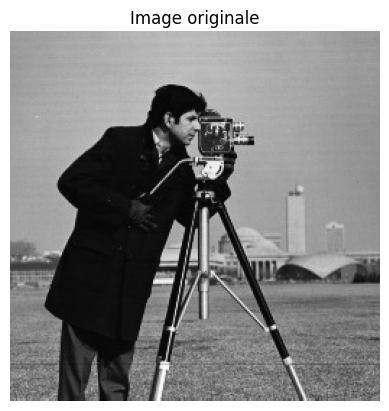

In [ ]:
# Charger l'image en niveaux de gris
img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Afficher l'image
plt.imshow(img, cmap='gray')
plt.title("Image originale")
plt.axis('off')
plt.show()

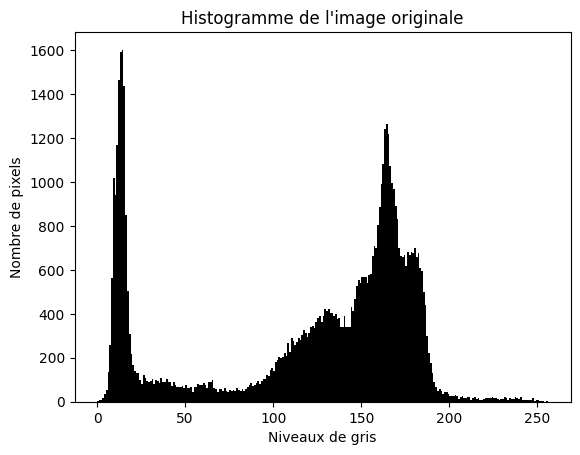

In [ ]:
def plot_histogram(image, title):
    plt.figure()
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(title)
    plt.xlabel("Niveaux de gris")
    plt.ylabel("Nombre de pixels")
    plt.show()

plot_histogram(img, "Histogramme de l'image originale")

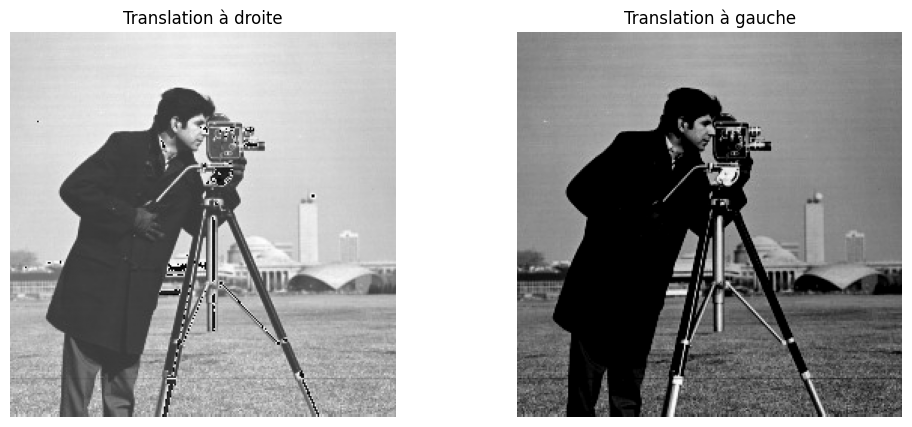

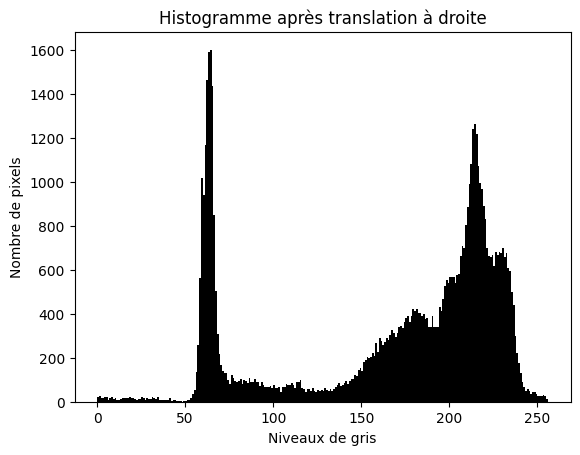

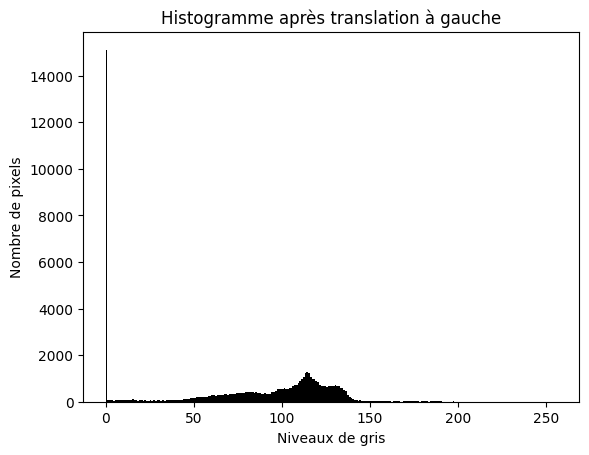

In [ ]:
def translate_image(image, shift_value):
    translated = np.clip(image + shift_value, 0, 255).astype(np.uint8)
    return translated

img_right = translate_image(img, 50)  # Translation vers la droite
img_left = translate_image(img, -50)  # Translation vers la gauche

# Affichage des images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_right, cmap='gray')
axes[0].set_title("Translation à droite")
axes[0].axis("off")

axes[1].imshow(img_left, cmap='gray')
axes[1].set_title("Translation à gauche")
axes[1].axis("off")

plt.show()

# Affichage des histogrammes
plot_histogram(img_right, "Histogramme après translation à droite")
plot_histogram(img_left, "Histogramme après translation à gauche")

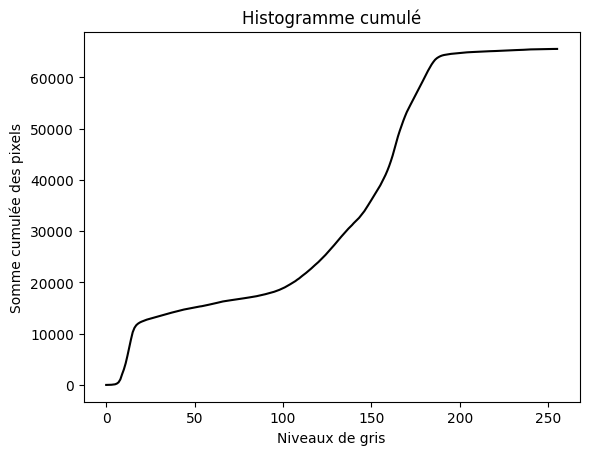

In [ ]:
hist_cumule = np.cumsum(cv2.calcHist([img], [0], None, [256], [0, 256]))

plt.figure()
plt.plot(hist_cumule, color='black')
plt.title("Histogramme cumulé")
plt.xlabel("Niveaux de gris")
plt.ylabel("Somme cumulée des pixels")
plt.show()

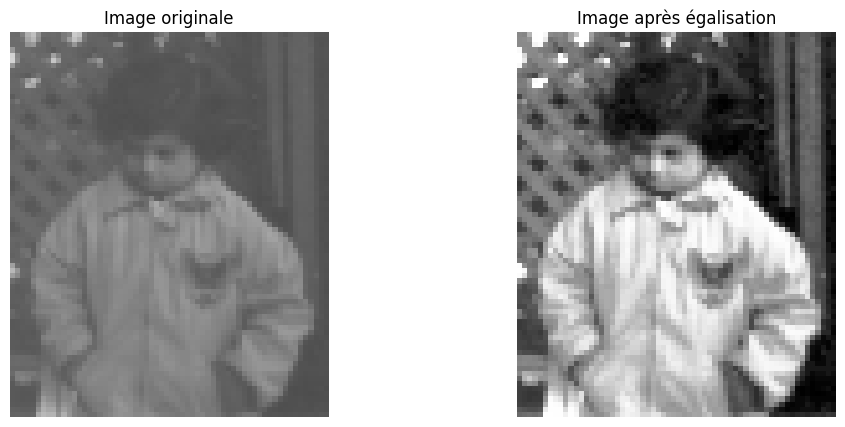

In [ ]:
# Charger l'image thumb_pout en couleur
img_rgb = cv2.imread('thumb_pout.png')
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Séparer les canaux de couleur
r, g, b = cv2.split(img_rgb)

# Appliquer l'égalisation sur chaque canal
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Recomposer l'image
img_eq = cv2.merge([r_eq, g_eq, b_eq])

# Affichage
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb)
axes[0].set_title("Image originale")
axes[0].axis("off")

axes[1].imshow(img_eq)
axes[1].set_title("Image après égalisation")
axes[1].axis("off")

plt.show()

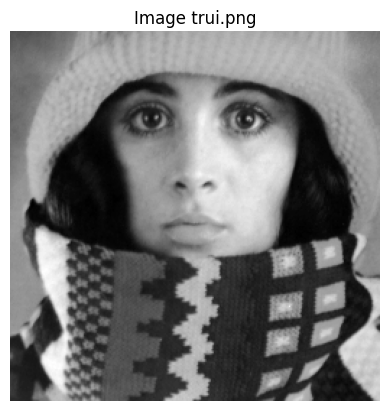

In [ ]:
img_trui = cv2.imread('trui.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_trui, cmap='gray')
plt.title("Image trui.png")
plt.axis('off')
plt.show()

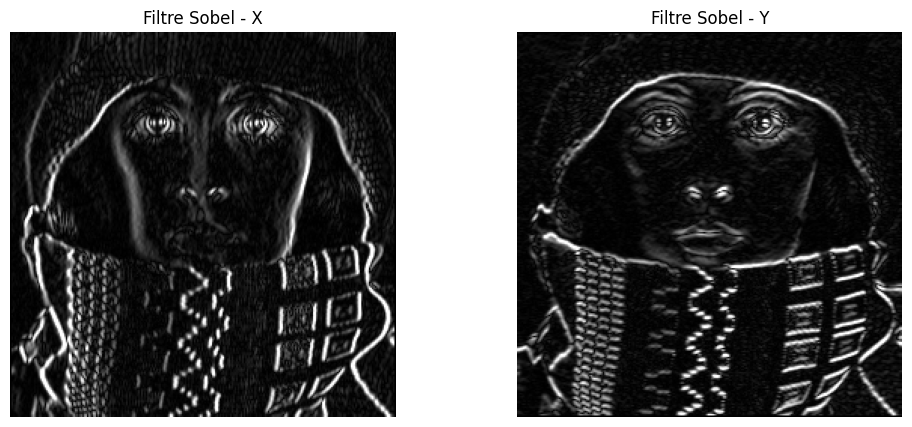

In [ ]:
sobel_x = cv2.Sobel(img_trui, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_trui, cv2.CV_64F, 0, 1, ksize=3)

# Convertir en valeurs positives
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Affichage
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(sobel_x, cmap='gray')
axes[0].set_title("Filtre Sobel - X")
axes[0].axis("off")

axes[1].imshow(sobel_y, cmap='gray')
axes[1].set_title("Filtre Sobel - Y")
axes[1].axis("off")

plt.show()

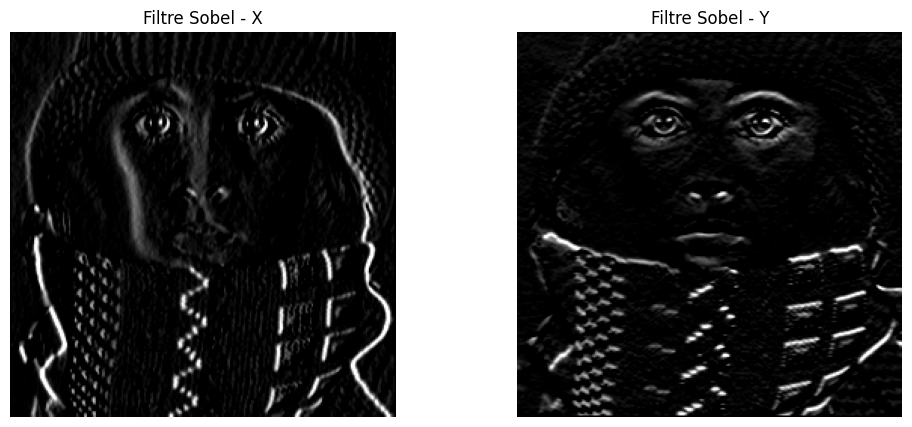

In [ ]:
kernelX = np.array([[-1, 0, 1],
                   [-2,  0, 2],
                   [-1, 0, 1]])
kernelY = np.array([[-1, -2, -1],
                   [0,  0, 0],
                   [1, 2, 1]])
sobel_x=cv2.filter2D(img_trui, -1, kernelX)
sobel_y=cv2.filter2D(img_trui, -1, kernelY)
# Affichage
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(sobel_x, cmap='gray')
axes[0].set_title("Filtre Sobel - X")
axes[0].axis("off")

axes[1].imshow(sobel_y, cmap='gray')
axes[1].set_title("Filtre Sobel - Y")
axes[1].axis("off")

plt.show()

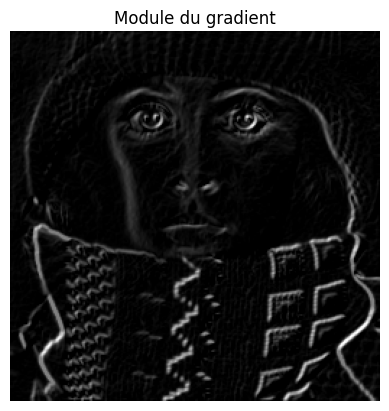

In [ ]:
gradient_magnitude = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Module du gradient")
plt.axis('off')
plt.show()

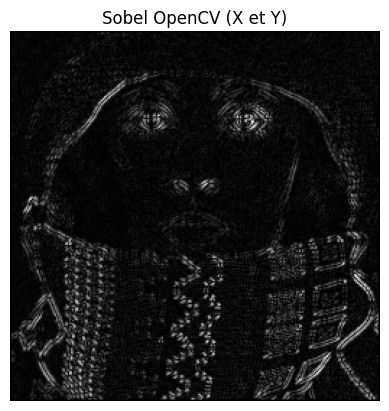

In [ ]:
sobel_opencv = cv2.Sobel(img_trui, cv2.CV_64F, 1, 1, ksize=3)
sobel_opencv = cv2.convertScaleAbs(sobel_opencv)

plt.imshow(sobel_opencv, cmap='gray')
plt.title("Sobel OpenCV (X et Y)")
plt.axis('off')
plt.show()

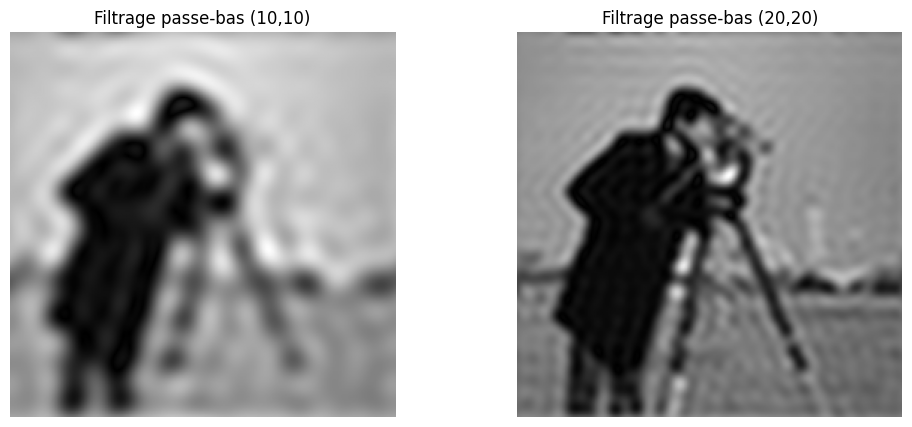

In [ ]:
def low_pass_filter(image, cutoff):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    mask = np.zeros((rows, cols), np.uint8)
    center = (rows // 2, cols // 2)
    mask[center[0] - cutoff:center[0] + cutoff, center[1] - cutoff:center[1] + cutoff] = 1

    filtered_dft = dft_shift * mask
    result = np.fft.ifft2(np.fft.ifftshift(filtered_dft))
    return np.abs(result)

lp_img_10 = low_pass_filter(img, 10)
lp_img_20 = low_pass_filter(img, 20)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(lp_img_10, cmap='gray')
axes[0].set_title("Filtrage passe-bas (10,10)")
axes[0].axis("off")

axes[1].imshow(lp_img_20, cmap='gray')
axes[1].set_title("Filtrage passe-bas (20,20)")
axes[1].axis("off")

plt.show()

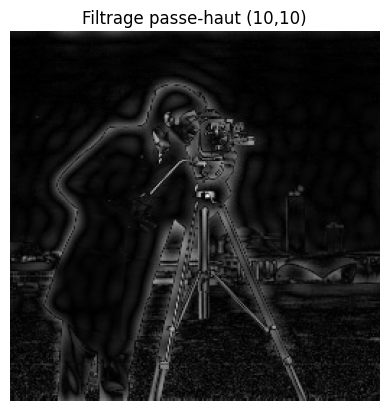

In [ ]:
def high_pass_filter(image, cutoff):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    mask = np.ones((rows, cols), np.uint8)
    center = (rows // 2, cols // 2)
    mask[center[0] - cutoff:center[0] + cutoff, center[1] - cutoff:center[1] + cutoff] = 0

    filtered_dft = dft_shift * mask
    result = np.fft.ifft2(np.fft.ifftshift(filtered_dft))
    return np.abs(result)

hp_img_10 = high_pass_filter(img, 10)

plt.imshow(hp_img_10, cmap='gray')
plt.title("Filtrage passe-haut (10,10)")
plt.axis("off")
plt.show()

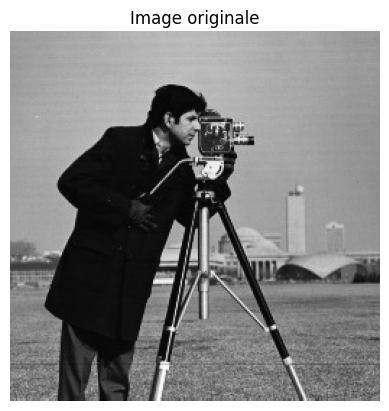

In [ ]:
kernel = np.ones((5,5), np.uint8)
image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title("Image originale")
plt.axis('off')
plt.show()

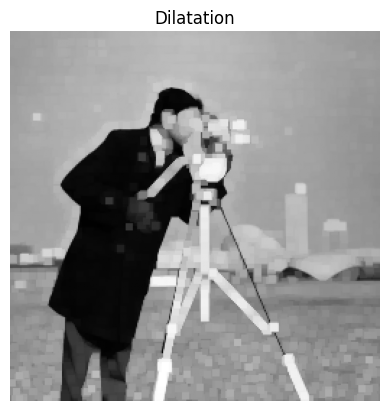

In [ ]:
# la dilatation : Agrandit les objets blancs, remplit les trous.
dilated = cv2.dilate(image, kernel, iterations=1)

plt.imshow(dilated, cmap='gray')
plt.title("Dilatation")
plt.axis('off')
plt.show()


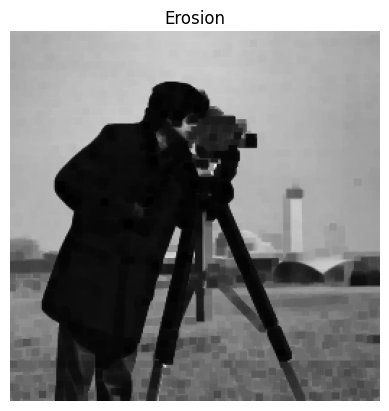

In [ ]:
# érosion : Rétrécit les objets blancs, élimine le bruit.
eroded = cv2.erode(image, kernel, iterations=1)

plt.imshow(eroded, cmap='gray')
plt.title("Erosion")
plt.axis('off')
plt.show()

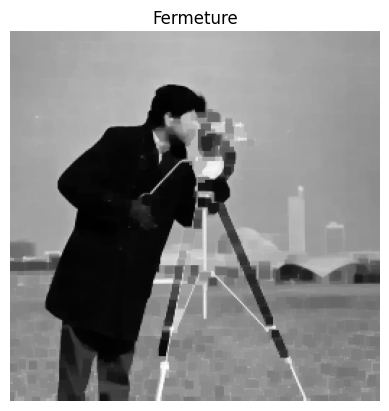

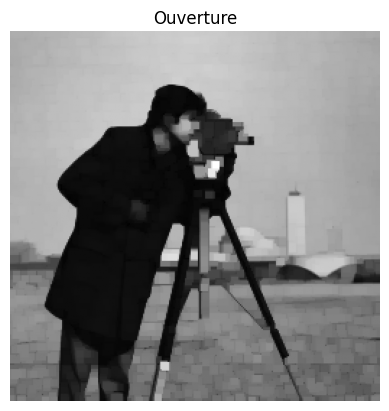

In [ ]:
# fermeture (dilatation suivie d'une érosion) :  Comble les trous dans un objet blanc.
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# ouverture (érosion suivie d'une dilatation) : Élimine le bruit (petits objets blancs isolés).
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.imshow(closing, cmap='gray')
plt.title("Fermeture")
plt.axis('off')
plt.show()

plt.imshow(opening, cmap='gray')
plt.title("Ouverture")
plt.axis('off')
plt.show()

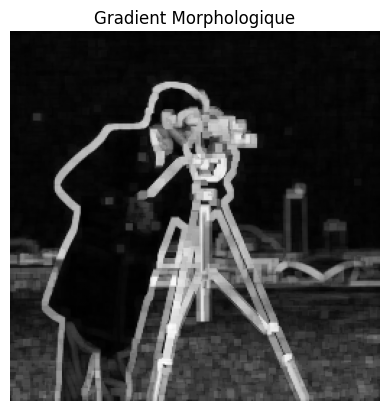

In [ ]:
# gradient morphologique (différence entre dilatation et érosion) : Extrait les contours des objets.
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

plt.imshow(gradient, cmap='gray')
plt.title("Gradient Morphologique")
plt.axis('off')
plt.show()

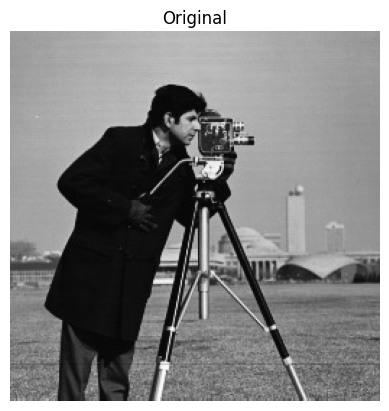

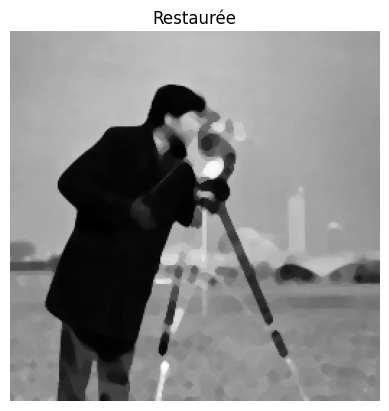

In [ ]:
# un filtre médian pour réduire le bruit
restored = cv2.medianBlur(closing, 5)  # 5 comme la taille du filtre

plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.show()

plt.imshow(restored, cmap='gray')
plt.title("Restaurée")
plt.axis('off')
plt.show()
